In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gymnasium
import minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.1
        self.epsilon = 0.3
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        
        next_q_value = self.q_values[next_state][next_action]
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
        ###########################################################################
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        ###########################################################################
        return action

In [3]:
from utils import gen_wrapped_env, show_video
from utils_plot import clear_video_folder

In [4]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
#env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs, info = env.reset()

agent_position = obs[0]

agent = SARSA(3, agent_position)

/opt/anaconda3/envs/rl_env/lib/python3.9/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [5]:
rewards = []
clear_video_folder('./video')
for ep in range(20000):
    done = False
    obs, info = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    
    while not done:
        next_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
        
    rewards.append(ep_rewards)
    
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))

     
env.close()

MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-0.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-0.mp4
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-1.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-1.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-1.mp4
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-8.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-8.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-8.mp4
episode: 20, rewards: 0


MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-27.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-27.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-27.mp4


episode: 40, rewards: 0
episode: 60, rewards: 0
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-64.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-64.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-64.mp4
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0


MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-125.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-125.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-125.mp4
episode: 140, rewards: 0
episode: 160, rewards: 0


episode: 180, rewards: 0
episode: 200, rewards: 0
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-216.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-216.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-216.mp4
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0


episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-343.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-343.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-343.mp4
episode: 360, rewards: 0.118
episode: 380, rewards: 0
episode: 400, rewards: 0


episode: 420, rewards: 0
episode: 440, rewards: 0.838
episode: 460, rewards: 0
episode: 480, rewards: 0.4959999999999999
episode: 500, rewards: 0
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-512.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-512.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-512.mp4
episode: 520, rewards: 0.478
episode: 540, rewards: 0.31599999999999995
episode: 560, rewards: 0.09999999999999998
episode: 580, rewards: 0.514


episode: 600, rewards: 0.766
episode: 620, rewards: 0.6759999999999999
episode: 640, rewards: 0
episode: 660, rewards: 0.622
episode: 680, rewards: 0.5680000000000001
episode: 700, rewards: 0
episode: 720, rewards: 0.478
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-729.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-729.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-729.mp4
episode: 740, rewards: 0
episode: 760, rewards: 0.856
episode: 780, rewards: 0.118


episode: 800, rewards: 0.856
episode: 820, rewards: 0.4059999999999999
episode: 840, rewards: 0
episode: 860, rewards: 0
episode: 880, rewards: 0
episode: 900, rewards: 0.856
episode: 920, rewards: 0.136
episode: 940, rewards: 0
episode: 960, rewards: 0
episode: 980, rewards: 0
episode: 1000, rewards: 0.802
MoviePy - Building video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-1000.mp4.
MoviePy - Writing video /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-1000.mp4



MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-1000.mp4
episode: 1020, rewards: 0
episode: 1040, rewards: 0.15400000000000003


episode: 1060, rewards: 0.586
episode: 1080, rewards: 0.784
episode: 1100, rewards: 0
episode: 1120, rewards: 0
episode: 1140, rewards: 0.748
episode: 1160, rewards: 0
episode: 1180, rewards: 0.6399999999999999
episode: 1200, rewards: 0
episode: 1220, rewards: 0.622
episode: 1240, rewards: 0.82
episode: 1260, rewards: 0.82
episode: 1280, rewards: 0.874
episode: 1300, rewards: 0.838
episode: 1320, rewards: 0
episode: 1340, rewards: 0.136
episode: 1360, rewards: 0
episode: 1380, rewards: 0.586
episode: 1400, rewards: 0.09999999999999998
episode: 1420, rewards: 0.6579999999999999
episode: 1440, rewards: 0
episode: 1460, rewards: 0.622
episode: 1480, rewards: 0.82
episode: 1500, rewards: 0.6399999999999999
episode: 1520, rewards: 0
episode: 1540, rewards: 0.856
episode: 1560, rewards: 0.6579999999999999
episode: 1580, rewards: 0.6759999999999999
episode: 1600, rewards: 0
episode: 1620, rewards: 0
episode: 1640, rewards: 0
episode: 1660, rewards: 0
episode: 1680, rewards: 0.3159999999999999

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-2000.mp4
episode: 2020, rewards: 0.29799999999999993


episode: 2040, rewards: 0.532
episode: 2060, rewards: 0
episode: 2080, rewards: 0.6399999999999999
episode: 2100, rewards: 0.352
episode: 2120, rewards: 0.31599999999999995
episode: 2140, rewards: 0
episode: 2160, rewards: 0.478
episode: 2180, rewards: 0
episode: 2200, rewards: 0.874
episode: 2220, rewards: 0
episode: 2240, rewards: 0
episode: 2260, rewards: 0.802
episode: 2280, rewards: 0.09999999999999998
episode: 2300, rewards: 0.20799999999999996
episode: 2320, rewards: 0
episode: 2340, rewards: 0
episode: 2360, rewards: 0
episode: 2380, rewards: 0.6759999999999999
episode: 2400, rewards: 0.712
episode: 2420, rewards: 0
episode: 2440, rewards: 0.82
episode: 2460, rewards: 0.586
episode: 2480, rewards: 0
episode: 2500, rewards: 0.82
episode: 2520, rewards: 0
episode: 2540, rewards: 0.6579999999999999
episode: 2560, rewards: 0.3879999999999999
episode: 2580, rewards: 0
episode: 2600, rewards: 0.29799999999999993
episode: 2620, rewards: 0.20799999999999996
episode: 2640, rewards: 0.38

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-3000.mp4
episode: 3020, rewards: 0.73
episode: 3040, rewards: 0
episode: 3060, rewards: 0.17199999999999993


episode: 3080, rewards: 0.766
episode: 3100, rewards: 0.20799999999999996
episode: 3120, rewards: 0.31599999999999995
episode: 3140, rewards: 0
episode: 3160, rewards: 0
episode: 3180, rewards: 0.604
episode: 3200, rewards: 0
episode: 3220, rewards: 0.856
episode: 3240, rewards: 0.604
episode: 3260, rewards: 0
episode: 3280, rewards: 0
episode: 3300, rewards: 0.31599999999999995
episode: 3320, rewards: 0.22599999999999998
episode: 3340, rewards: 0.55
episode: 3360, rewards: 0
episode: 3380, rewards: 0.5680000000000001
episode: 3400, rewards: 0
episode: 3420, rewards: 0.712
episode: 3440, rewards: 0
episode: 3460, rewards: 0.6759999999999999
episode: 3480, rewards: 0
episode: 3500, rewards: 0.5680000000000001
episode: 3520, rewards: 0
episode: 3540, rewards: 0
episode: 3560, rewards: 0.352
episode: 3580, rewards: 0
episode: 3600, rewards: 0.18999999999999995
episode: 3620, rewards: 0.856
episode: 3640, rewards: 0
episode: 3660, rewards: 0.712
episode: 3680, rewards: 0.6399999999999999


MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-4000.mp4
episode: 4020, rewards: 0.5680000000000001
episode: 4040, rewards: 0


episode: 4060, rewards: 0.42399999999999993
episode: 4080, rewards: 0.20799999999999996
episode: 4100, rewards: 0
episode: 4120, rewards: 0
episode: 4140, rewards: 0.712
episode: 4160, rewards: 0
episode: 4180, rewards: 0
episode: 4200, rewards: 0
episode: 4220, rewards: 0
episode: 4240, rewards: 0.136
episode: 4260, rewards: 0
episode: 4280, rewards: 0
episode: 4300, rewards: 0
episode: 4320, rewards: 0.18999999999999995
episode: 4340, rewards: 0.262
episode: 4360, rewards: 0.29799999999999993
episode: 4380, rewards: 0
episode: 4400, rewards: 0.802
episode: 4420, rewards: 0.784
episode: 4440, rewards: 0.15400000000000003
episode: 4460, rewards: 0.838
episode: 4480, rewards: 0
episode: 4500, rewards: 0
episode: 4520, rewards: 0
episode: 4540, rewards: 0.838
episode: 4560, rewards: 0.766
episode: 4580, rewards: 0
episode: 4600, rewards: 0.874
episode: 4620, rewards: 0
episode: 4640, rewards: 0.45999999999999996
episode: 4660, rewards: 0
episode: 4680, rewards: 0
episode: 4700, rewards: 

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-5000.mp4
episode: 5020, rewards: 0.33399999999999996


episode: 5040, rewards: 0
episode: 5060, rewards: 0.22599999999999998
episode: 5080, rewards: 0.838
episode: 5100, rewards: 0
episode: 5120, rewards: 0.15400000000000003
episode: 5140, rewards: 0.82
episode: 5160, rewards: 0.136
episode: 5180, rewards: 0.802
episode: 5200, rewards: 0.6399999999999999
episode: 5220, rewards: 0.4959999999999999
episode: 5240, rewards: 0
episode: 5260, rewards: 0.514
episode: 5280, rewards: 0
episode: 5300, rewards: 0.17199999999999993
episode: 5320, rewards: 0
episode: 5340, rewards: 0.262
episode: 5360, rewards: 0.748
episode: 5380, rewards: 0.29799999999999993
episode: 5400, rewards: 0
episode: 5420, rewards: 0.37
episode: 5440, rewards: 0
episode: 5460, rewards: 0
episode: 5480, rewards: 0.4059999999999999
episode: 5500, rewards: 0.45999999999999996
episode: 5520, rewards: 0
episode: 5540, rewards: 0.22599999999999998
episode: 5560, rewards: 0
episode: 5580, rewards: 0.44199999999999995
episode: 5600, rewards: 0.244
episode: 5620, rewards: 0.622
episo

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-6000.mp4
episode: 6020, rewards: 0


episode: 6040, rewards: 0
episode: 6060, rewards: 0.262
episode: 6080, rewards: 0.748
episode: 6100, rewards: 0.82
episode: 6120, rewards: 0.532
episode: 6140, rewards: 0.532
episode: 6160, rewards: 0.42399999999999993
episode: 6180, rewards: 0
episode: 6200, rewards: 0.622
episode: 6220, rewards: 0
episode: 6240, rewards: 0.6399999999999999
episode: 6260, rewards: 0
episode: 6280, rewards: 0.586
episode: 6300, rewards: 0
episode: 6320, rewards: 0.514
episode: 6340, rewards: 0
episode: 6360, rewards: 0.478
episode: 6380, rewards: 0.478
episode: 6400, rewards: 0
episode: 6420, rewards: 0.352
episode: 6440, rewards: 0.73
episode: 6460, rewards: 0.532
episode: 6480, rewards: 0
episode: 6500, rewards: 0
episode: 6520, rewards: 0
episode: 6540, rewards: 0
episode: 6560, rewards: 0.6579999999999999
episode: 6580, rewards: 0
episode: 6600, rewards: 0
episode: 6620, rewards: 0.874
episode: 6640, rewards: 0.802
episode: 6660, rewards: 0
episode: 6680, rewards: 0
episode: 6700, rewards: 0.37
epi

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-7000.mp4
episode: 7020, rewards: 0.2799999999999999
episode: 7040, rewards: 0


episode: 7060, rewards: 0.82
episode: 7080, rewards: 0.874
episode: 7100, rewards: 0.33399999999999996
episode: 7120, rewards: 0
episode: 7140, rewards: 0.6759999999999999
episode: 7160, rewards: 0
episode: 7180, rewards: 0
episode: 7200, rewards: 0.6399999999999999
episode: 7220, rewards: 0.44199999999999995
episode: 7240, rewards: 0.874
episode: 7260, rewards: 0
episode: 7280, rewards: 0.17199999999999993
episode: 7300, rewards: 0
episode: 7320, rewards: 0.118
episode: 7340, rewards: 0
episode: 7360, rewards: 0
episode: 7380, rewards: 0
episode: 7400, rewards: 0
episode: 7420, rewards: 0
episode: 7440, rewards: 0.802
episode: 7460, rewards: 0.262
episode: 7480, rewards: 0
episode: 7500, rewards: 0
episode: 7520, rewards: 0.712
episode: 7540, rewards: 0
episode: 7560, rewards: 0.532
episode: 7580, rewards: 0.55
episode: 7600, rewards: 0.37
episode: 7620, rewards: 0.17199999999999993
episode: 7640, rewards: 0.802
episode: 7660, rewards: 0
episode: 7680, rewards: 0
episode: 7700, reward

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-8000.mp4
episode: 8020, rewards: 0
episode: 8040, rewards: 0
episode: 8060, rewards: 0.6579999999999999
episode: 8080, rewards: 0
episode: 8100, rewards: 0


episode: 8120, rewards: 0
episode: 8140, rewards: 0.17199999999999993
episode: 8160, rewards: 0.6579999999999999
episode: 8180, rewards: 0
episode: 8200, rewards: 0
episode: 8220, rewards: 0
episode: 8240, rewards: 0.20799999999999996
episode: 8260, rewards: 0
episode: 8280, rewards: 0.22599999999999998
episode: 8300, rewards: 0
episode: 8320, rewards: 0.45999999999999996
episode: 8340, rewards: 0.73
episode: 8360, rewards: 0.55
episode: 8380, rewards: 0.748
episode: 8400, rewards: 0
episode: 8420, rewards: 0.712
episode: 8440, rewards: 0
episode: 8460, rewards: 0.118
episode: 8480, rewards: 0
episode: 8500, rewards: 0.22599999999999998
episode: 8520, rewards: 0
episode: 8540, rewards: 0.766
episode: 8560, rewards: 0.18999999999999995
episode: 8580, rewards: 0.4059999999999999
episode: 8600, rewards: 0.838
episode: 8620, rewards: 0
episode: 8640, rewards: 0
episode: 8660, rewards: 0.766
episode: 8680, rewards: 0.33399999999999996
episode: 8700, rewards: 0.6759999999999999
episode: 8720

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-9000.mp4
episode: 9020, rewards: 0
episode: 9040, rewards: 0


episode: 9060, rewards: 0.784
episode: 9080, rewards: 0
episode: 9100, rewards: 0.6759999999999999
episode: 9120, rewards: 0.55
episode: 9140, rewards: 0.748
episode: 9160, rewards: 0.37
episode: 9180, rewards: 0.31599999999999995
episode: 9200, rewards: 0.586
episode: 9220, rewards: 0.22599999999999998
episode: 9240, rewards: 0.478
episode: 9260, rewards: 0.784
episode: 9280, rewards: 0.82
episode: 9300, rewards: 0.6399999999999999
episode: 9320, rewards: 0.09999999999999998
episode: 9340, rewards: 0.802
episode: 9360, rewards: 0.18999999999999995
episode: 9380, rewards: 0
episode: 9400, rewards: 0.6579999999999999
episode: 9420, rewards: 0
episode: 9440, rewards: 0.6579999999999999
episode: 9460, rewards: 0
episode: 9480, rewards: 0
episode: 9500, rewards: 0
episode: 9520, rewards: 0
episode: 9540, rewards: 0.29799999999999993
episode: 9560, rewards: 0
episode: 9580, rewards: 0.712
episode: 9600, rewards: 0
episode: 9620, rewards: 0
episode: 9640, rewards: 0.136
episode: 9660, reward

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-10000.mp4
episode: 10020, rewards: 0.532
episode: 10040, rewards: 0.44199999999999995


episode: 10060, rewards: 0.82
episode: 10080, rewards: 0.766
episode: 10100, rewards: 0
episode: 10120, rewards: 0.748
episode: 10140, rewards: 0
episode: 10160, rewards: 0.118
episode: 10180, rewards: 0
episode: 10200, rewards: 0
episode: 10220, rewards: 0
episode: 10240, rewards: 0.4059999999999999
episode: 10260, rewards: 0
episode: 10280, rewards: 0
episode: 10300, rewards: 0.694
episode: 10320, rewards: 0
episode: 10340, rewards: 0.784
episode: 10360, rewards: 0
episode: 10380, rewards: 0
episode: 10400, rewards: 0.766
episode: 10420, rewards: 0.6399999999999999
episode: 10440, rewards: 0.31599999999999995
episode: 10460, rewards: 0.622
episode: 10480, rewards: 0.4059999999999999
episode: 10500, rewards: 0.856
episode: 10520, rewards: 0.4959999999999999
episode: 10540, rewards: 0.784
episode: 10560, rewards: 0
episode: 10580, rewards: 0.586
episode: 10600, rewards: 0.838
episode: 10620, rewards: 0
episode: 10640, rewards: 0.09999999999999998
episode: 10660, rewards: 0.82
episode: 

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-11000.mp4
episode: 11020, rewards: 0.33399999999999996


episode: 11040, rewards: 0.856
episode: 11060, rewards: 0
episode: 11080, rewards: 0.44199999999999995
episode: 11100, rewards: 0
episode: 11120, rewards: 0.478
episode: 11140, rewards: 0.694
episode: 11160, rewards: 0
episode: 11180, rewards: 0.856
episode: 11200, rewards: 0.694
episode: 11220, rewards: 0
episode: 11240, rewards: 0.838
episode: 11260, rewards: 0.5680000000000001
episode: 11280, rewards: 0.586
episode: 11300, rewards: 0.478
episode: 11320, rewards: 0
episode: 11340, rewards: 0
episode: 11360, rewards: 0
episode: 11380, rewards: 0
episode: 11400, rewards: 0.3879999999999999
episode: 11420, rewards: 0
episode: 11440, rewards: 0
episode: 11460, rewards: 0.478
episode: 11480, rewards: 0
episode: 11500, rewards: 0
episode: 11520, rewards: 0.478
episode: 11540, rewards: 0
episode: 11560, rewards: 0
episode: 11580, rewards: 0.73
episode: 11600, rewards: 0.09999999999999998
episode: 11620, rewards: 0
episode: 11640, rewards: 0.514
episode: 11660, rewards: 0.262
episode: 11680,

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-12000.mp4
episode: 12020, rewards: 0.532
episode: 12040, rewards: 0.712


episode: 12060, rewards: 0
episode: 12080, rewards: 0
episode: 12100, rewards: 0
episode: 12120, rewards: 0.874
episode: 12140, rewards: 0.586
episode: 12160, rewards: 0
episode: 12180, rewards: 0.42399999999999993
episode: 12200, rewards: 0.82
episode: 12220, rewards: 0
episode: 12240, rewards: 0.118
episode: 12260, rewards: 0.586
episode: 12280, rewards: 0.766
episode: 12300, rewards: 0
episode: 12320, rewards: 0.22599999999999998
episode: 12340, rewards: 0.44199999999999995
episode: 12360, rewards: 0
episode: 12380, rewards: 0.784
episode: 12400, rewards: 0.712
episode: 12420, rewards: 0
episode: 12440, rewards: 0
episode: 12460, rewards: 0.6579999999999999
episode: 12480, rewards: 0.856
episode: 12500, rewards: 0.874
episode: 12520, rewards: 0
episode: 12540, rewards: 0.622
episode: 12560, rewards: 0
episode: 12580, rewards: 0.82
episode: 12600, rewards: 0.82
episode: 12620, rewards: 0.82
episode: 12640, rewards: 0.352
episode: 12660, rewards: 0.6399999999999999
episode: 12680, rew

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-13000.mp4
episode: 13020, rewards: 0
episode: 13040, rewards: 0.514
episode: 13060, rewards: 0.2799999999999999
episode: 13080, rewards: 0


episode: 13100, rewards: 0.802
episode: 13120, rewards: 0.748
episode: 13140, rewards: 0
episode: 13160, rewards: 0.748
episode: 13180, rewards: 0.42399999999999993
episode: 13200, rewards: 0.3879999999999999
episode: 13220, rewards: 0.802
episode: 13240, rewards: 0
episode: 13260, rewards: 0
episode: 13280, rewards: 0.352
episode: 13300, rewards: 0
episode: 13320, rewards: 0.532
episode: 13340, rewards: 0.37
episode: 13360, rewards: 0
episode: 13380, rewards: 0
episode: 13400, rewards: 0.856
episode: 13420, rewards: 0
episode: 13440, rewards: 0
episode: 13460, rewards: 0.31599999999999995
episode: 13480, rewards: 0.856
episode: 13500, rewards: 0.45999999999999996
episode: 13520, rewards: 0.766
episode: 13540, rewards: 0.82
episode: 13560, rewards: 0.838
episode: 13580, rewards: 0.33399999999999996
episode: 13600, rewards: 0
episode: 13620, rewards: 0.3879999999999999
episode: 13640, rewards: 0.33399999999999996
episode: 13660, rewards: 0.44199999999999995
episode: 13680, rewards: 0.24

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-14000.mp4


episode: 14020, rewards: 0.784
episode: 14040, rewards: 0
episode: 14060, rewards: 0.22599999999999998
episode: 14080, rewards: 0.82
episode: 14100, rewards: 0.694
episode: 14120, rewards: 0
episode: 14140, rewards: 0
episode: 14160, rewards: 0
episode: 14180, rewards: 0
episode: 14200, rewards: 0.4059999999999999
episode: 14220, rewards: 0.604
episode: 14240, rewards: 0.44199999999999995
episode: 14260, rewards: 0.09999999999999998
episode: 14280, rewards: 0
episode: 14300, rewards: 0
episode: 14320, rewards: 0.352
episode: 14340, rewards: 0.784
episode: 14360, rewards: 0
episode: 14380, rewards: 0.694
episode: 14400, rewards: 0.838
episode: 14420, rewards: 0
episode: 14440, rewards: 0
episode: 14460, rewards: 0.31599999999999995
episode: 14480, rewards: 0.532
episode: 14500, rewards: 0
episode: 14520, rewards: 0.694
episode: 14540, rewards: 0.874
episode: 14560, rewards: 0.42399999999999993
episode: 14580, rewards: 0.712
episode: 14600, rewards: 0.802
episode: 14620, rewards: 0.874
e

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-15000.mp4
episode: 15020, rewards: 0
episode: 15040, rewards: 0


episode: 15060, rewards: 0.6759999999999999
episode: 15080, rewards: 0.136
episode: 15100, rewards: 0
episode: 15120, rewards: 0.73
episode: 15140, rewards: 0.694
episode: 15160, rewards: 0
episode: 15180, rewards: 0.622
episode: 15200, rewards: 0.622
episode: 15220, rewards: 0.784
episode: 15240, rewards: 0
episode: 15260, rewards: 0
episode: 15280, rewards: 0
episode: 15300, rewards: 0.15400000000000003
episode: 15320, rewards: 0.784
episode: 15340, rewards: 0
episode: 15360, rewards: 0.82
episode: 15380, rewards: 0.766
episode: 15400, rewards: 0
episode: 15420, rewards: 0
episode: 15440, rewards: 0
episode: 15460, rewards: 0
episode: 15480, rewards: 0
episode: 15500, rewards: 0
episode: 15520, rewards: 0.874
episode: 15540, rewards: 0.82
episode: 15560, rewards: 0
episode: 15580, rewards: 0.4059999999999999
episode: 15600, rewards: 0.82
episode: 15620, rewards: 0
episode: 15640, rewards: 0
episode: 15660, rewards: 0
episode: 15680, rewards: 0
episode: 15700, rewards: 0.37
episode: 1

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-16000.mp4
episode: 16020, rewards: 0.55
episode: 16040, rewards: 0


episode: 16060, rewards: 0
episode: 16080, rewards: 0.586
episode: 16100, rewards: 0.82
episode: 16120, rewards: 0.802
episode: 16140, rewards: 0.118
episode: 16160, rewards: 0.5680000000000001
episode: 16180, rewards: 0.4959999999999999
episode: 16200, rewards: 0
episode: 16220, rewards: 0.37
episode: 16240, rewards: 0.6759999999999999
episode: 16260, rewards: 0.748
episode: 16280, rewards: 0.6579999999999999
episode: 16300, rewards: 0.6579999999999999
episode: 16320, rewards: 0.838
episode: 16340, rewards: 0
episode: 16360, rewards: 0
episode: 16380, rewards: 0
episode: 16400, rewards: 0.6579999999999999
episode: 16420, rewards: 0
episode: 16440, rewards: 0.3879999999999999
episode: 16460, rewards: 0
episode: 16480, rewards: 0.748
episode: 16500, rewards: 0.712
episode: 16520, rewards: 0.766
episode: 16540, rewards: 0
episode: 16560, rewards: 0
episode: 16580, rewards: 0
episode: 16600, rewards: 0.514
episode: 16620, rewards: 0.802
episode: 16640, rewards: 0.55
episode: 16660, reward

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-17000.mp4
episode: 17020, rewards: 0


episode: 17040, rewards: 0.4059999999999999
episode: 17060, rewards: 0
episode: 17080, rewards: 0.766
episode: 17100, rewards: 0.622
episode: 17120, rewards: 0
episode: 17140, rewards: 0.22599999999999998
episode: 17160, rewards: 0.262
episode: 17180, rewards: 0.17199999999999993
episode: 17200, rewards: 0.6399999999999999
episode: 17220, rewards: 0.838
episode: 17240, rewards: 0
episode: 17260, rewards: 0
episode: 17280, rewards: 0.73
episode: 17300, rewards: 0
episode: 17320, rewards: 0.838
episode: 17340, rewards: 0.55
episode: 17360, rewards: 0.784
episode: 17380, rewards: 0.73
episode: 17400, rewards: 0.45999999999999996
episode: 17420, rewards: 0
episode: 17440, rewards: 0.82
episode: 17460, rewards: 0.586
episode: 17480, rewards: 0.856
episode: 17500, rewards: 0
episode: 17520, rewards: 0
episode: 17540, rewards: 0.244
episode: 17560, rewards: 0.874
episode: 17580, rewards: 0
episode: 17600, rewards: 0.31599999999999995
episode: 17620, rewards: 0
episode: 17640, rewards: 0.65799

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-18000.mp4
episode: 18020, rewards: 0.514
episode: 18040, rewards: 0.478


episode: 18060, rewards: 0.712
episode: 18080, rewards: 0.838
episode: 18100, rewards: 0.262
episode: 18120, rewards: 0.478
episode: 18140, rewards: 0
episode: 18160, rewards: 0.856
episode: 18180, rewards: 0.29799999999999993
episode: 18200, rewards: 0
episode: 18220, rewards: 0
episode: 18240, rewards: 0
episode: 18260, rewards: 0.33399999999999996
episode: 18280, rewards: 0.874
episode: 18300, rewards: 0
episode: 18320, rewards: 0
episode: 18340, rewards: 0.29799999999999993
episode: 18360, rewards: 0.838
episode: 18380, rewards: 0
episode: 18400, rewards: 0
episode: 18420, rewards: 0.586
episode: 18440, rewards: 0.6399999999999999
episode: 18460, rewards: 0.766
episode: 18480, rewards: 0.784
episode: 18500, rewards: 0
episode: 18520, rewards: 0
episode: 18540, rewards: 0
episode: 18560, rewards: 0.31599999999999995
episode: 18580, rewards: 0.15400000000000003
episode: 18600, rewards: 0
episode: 18620, rewards: 0.22599999999999998
episode: 18640, rewards: 0
episode: 18660, rewards: 

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-19000.mp4
episode: 19020, rewards: 0
episode: 19040, rewards: 0.29799999999999993
episode: 19060, rewards: 0.802
episode: 19080, rewards: 0
episode: 19100, rewards: 0.3879999999999999
episode: 19120, rewards: 0
episode: 19140, rewards: 0
episode: 19160, rewards: 0
episode: 19180, rewards: 0
episode: 19200, rewards: 0
episode: 19220, rewards: 0
episode: 19240, rewards: 0.17199999999999993
episode: 19260, rewards: 0.42399999999999993
episode: 19280, rewards: 0.838
episode: 19300, rewards: 0
episode: 19320, rewards: 0.856
episode: 19340, rewards: 0
episode: 19360, rewards: 0.31599999999999995
episode: 19380, rewards: 0.6399999999999999
episode: 19400, rewards: 0
episode: 19420, rewards: 0.6759999999999999
episode: 19440, rewards: 0
episode: 19460, rewards: 0.856
episode: 19480, rewards: 0.838
episode: 19500, reward

MoviePy - Done !
MoviePy - video ready /Users/hyeokk/hyeokk_ws/Reinforcement Learning/Reinforcement Learning Assignment/SARSA,Q-Learning/Sarsa&Q-learning/video/rl-video-episode-20000.mp4


In [6]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{np.int64(0): [0.0, 0.0, 0.0],
 np.int64(12): [0.0, 0.0, 0.0],
 np.int64(24): [0.0, 0.0, 0.0],
 np.int64(36): [1e-05, 1e-05, 7e-05],
 np.int64(15): [0.0, 0.0, 2e-05],
 np.int64(18): [2e-05, 2e-05, 0.00032],
 np.int64(3): [0.0, 0.0, 0.0],
 np.int64(6): [0.0, 0.0, 0.0],
 np.int64(27): [5e-05, 5e-05, 0.00061],
 np.int64(39): [0.001, 0.00097, 0.01011],
 np.int64(21): [0.00029, 0.00026, 0.00243],
 np.int64(9): [0.0, 0.0, 1e-05],
 np.int64(30): [0.00084, 0.00087, 0.01164],
 np.int64(33): [0.01247, 0.01202, 0.12726],
 np.int64(45): [0.0, 0.0, 0.0],
 np.int64(42): [0.02418, 0.02576, 0.30244]}

In [7]:
show_video()

In [8]:
from utils_plot import save_rewards_log, plot_avgreward, compare_algorithms, plot_q_value_distribution

Saved to: ./logs/sarsa_rewards_gamma_0_10.csv


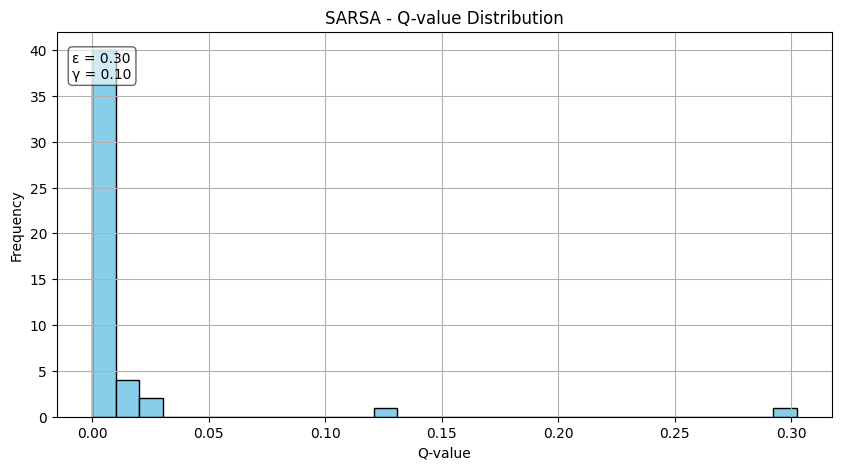

In [9]:
save_rewards_log(rewards, variable_name="gamma", agent=agent)
plot_q_value_distribution(agent)

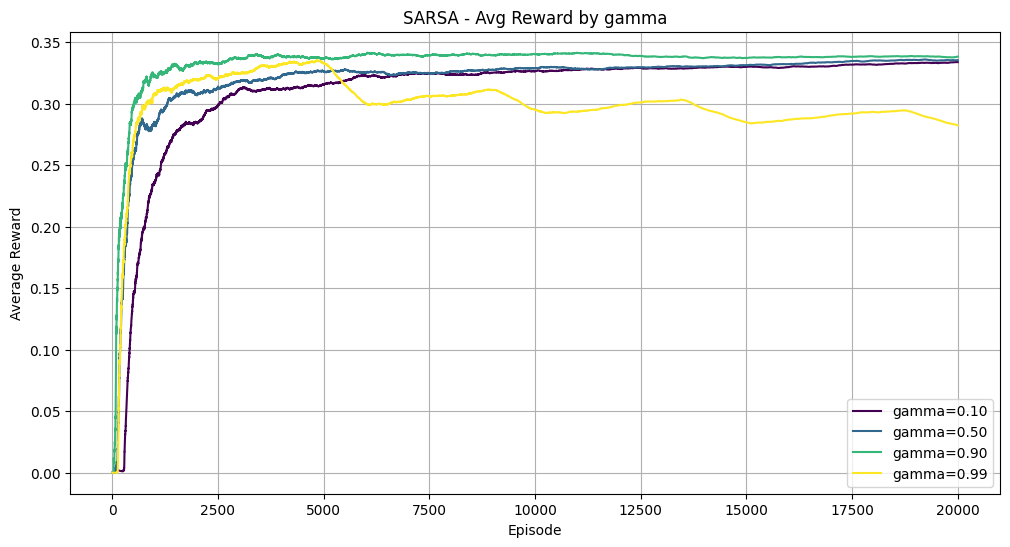

File not found: ./logs/qlearning_rewards_gamma_0_10.csv


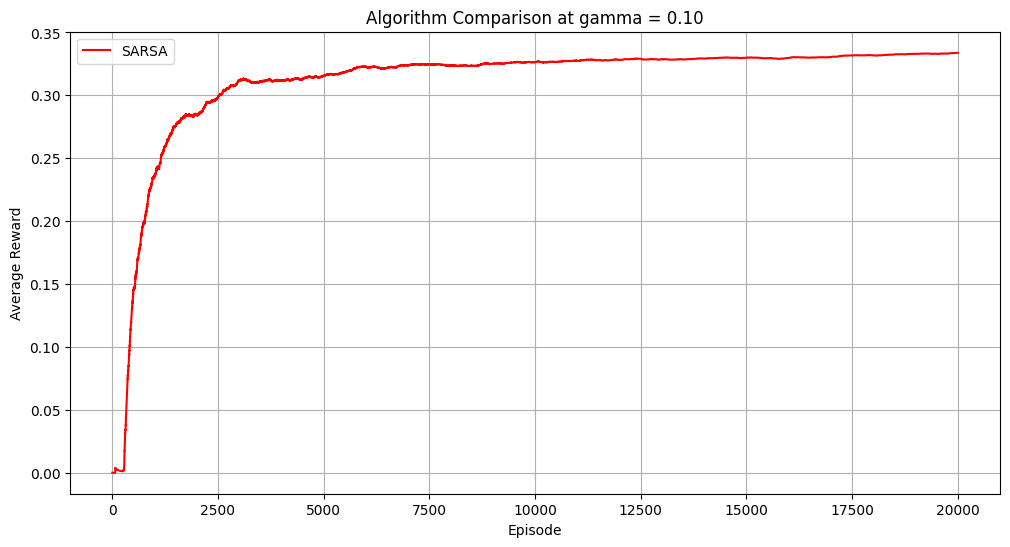

In [10]:
plot_avgreward("gamma", "SARSA")
compare_algorithms("gamma", 0.10)